In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

data =  pd.read_csv('C:/Users/sreeje.sreedhar/Downloads/COVID-19_Case_Surveillance_Public_Use_Data.csv')


c:\users\sreeje.sreedhar\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Impact of comorbidity 

In [2]:
status = data['current_status'].unique()
print (status)

['Laboratory-confirmed case' 'Probable Case']


In [3]:
slices = []
for con in status:   
    count_sttaus = data[(data.current_status == con)]
    slices.append(len(count_sttaus))

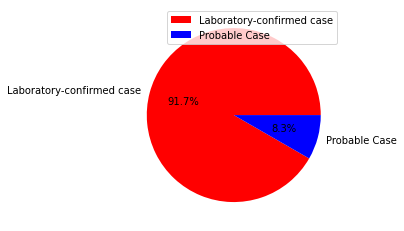

In [4]:
labels = status
slices = slices
colors = ['r','b'] 
plt.pie(slices, labels = labels, colors=colors,startangle = 0,autopct = '%1.1f%%')  
plt.legend(labels = labels) 
plt.show()

In [5]:
lab_confirmed = data[(data.current_status == "Laboratory-confirmed case")]

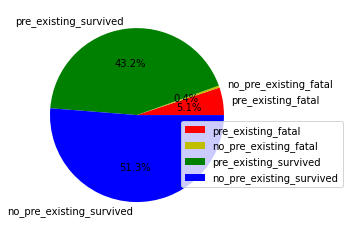

In [6]:
labels = ['pre_existing_fatal','no_pre_existing_fatal','pre_existing_survived', 'no_pre_existing_survived'] 

pre_existing_fatal = lab_confirmed[(lab_confirmed.medcond_yn == "Yes") & (lab_confirmed.death_yn == "Yes")]
no_pre_existing_fatal = lab_confirmed[(lab_confirmed.medcond_yn == "No") & (lab_confirmed.death_yn == "Yes")]
pre_existing_survived = lab_confirmed[(lab_confirmed.medcond_yn == "Yes") & (lab_confirmed.death_yn == "No")]
no_pre_existing_survived  = lab_confirmed[(lab_confirmed.medcond_yn == "No") & (lab_confirmed.death_yn == "No")]
  

slices = [len(pre_existing_fatal),len(no_pre_existing_fatal),len(pre_existing_survived), len(no_pre_existing_survived)]
colors = ['r', 'y', 'g', 'b'] 
  
pie  = plt.pie(slices, labels = labels, colors=colors,startangle = 0,autopct = '%1.1f%%') 

plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure)

plt.show()

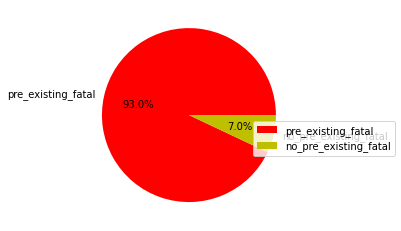

In [7]:
labels = ['pre_existing_fatal','no_pre_existing_fatal'] 

pre_existing_fatal = lab_confirmed[(lab_confirmed.medcond_yn == "Yes") & (lab_confirmed.death_yn == "Yes")]
no_pre_existing_fatal = lab_confirmed[(lab_confirmed.medcond_yn == "No") & (lab_confirmed.death_yn == "Yes")]

slices = [len(pre_existing_fatal),len(no_pre_existing_fatal)]
  
colors = ['r', 'y'] 
  
pie  = plt.pie(slices, labels = labels, colors=colors,startangle = 0,autopct = '%1.1f%%') 

plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure)
  
plt.show()

## Missing value identification

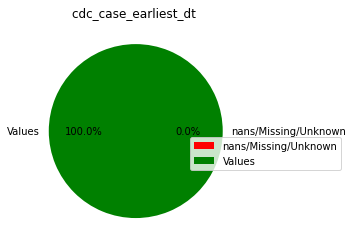

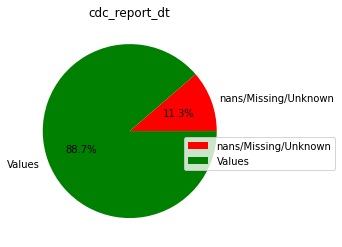

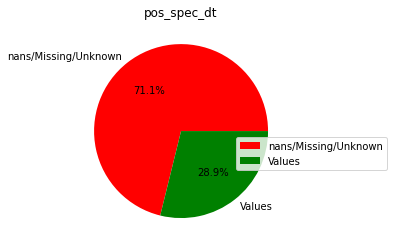

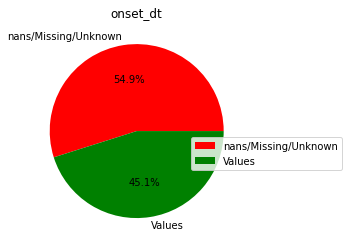

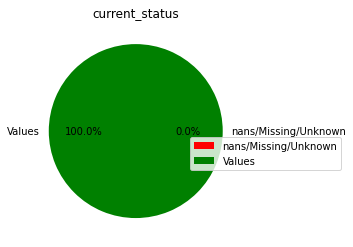

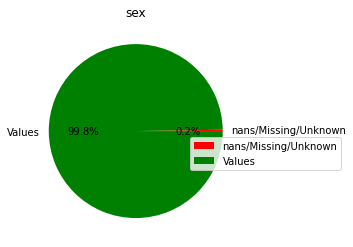

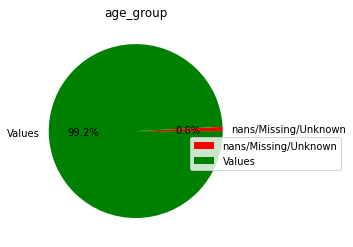

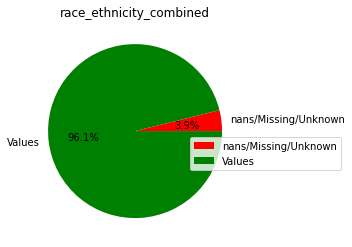

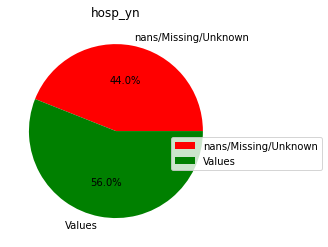

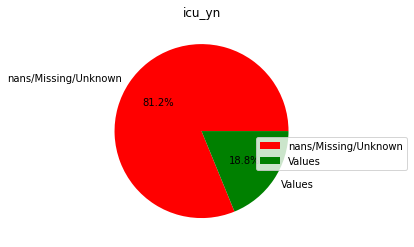

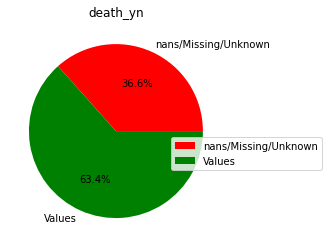

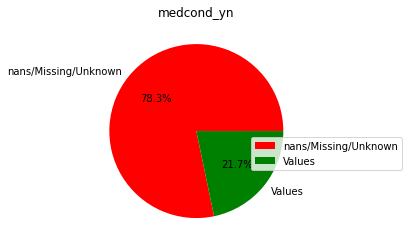

In [8]:
data_columns = data.columns
total_len = len(data)
nan_count = 0
miss_count = 0
unknown_count = 0
for column in  data_columns:
    nan_count = data[column].isnull().sum()
    value_count =  data[column].value_counts()
    dict_values = dict(value_count)
    keys_dict = dict_values.keys()
    if ("Missing" in keys_dict):
        miss_count = dict_values['Missing']
    elif ("Unknown" in keys_dict): 
        unknown_count = dict_values['Unknown'] 
        
    total_miss = nan_count + miss_count + unknown_count 
    imp_values = total_len - total_miss
    labels = ['nans/Missing/Unknown','Values']
    slices = [total_miss, imp_values]
    colors = ['r', 'g']   
    pie  = plt.pie(slices, labels = labels, colors=colors,startangle = 0,autopct = '%1.1f%%') 
    plt.title(column)
    plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure)
    plt.savefig('C:/Users/sreeje.sreedhar/Desktop/Untitled Folder/'+column+'.png')
    plt.show()

## If race influence pandemic

In [6]:
df_race = data[(data.race_ethnicity_combined != "Unknown") & (data.race_ethnicity_combined != "Missing")]

In [7]:
types_of_races = set(df_race['race_ethnicity_combined'].tolist())
print (types_of_races)

{nan, 'Hispanic/Latino', 'American Indian/Alaska Native, Non-Hispanic', 'Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'Black, Non-Hispanic', 'White, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic'}


In [14]:
df_race =  df_race[(df_race.current_status == "Laboratory-confirmed case")]
df_race['race_ethnicity_combined'].dropna()
print (len(df_race))
fatality_in_race = df_race[(df_race.death_yn == "Yes")]
print (len(fatality_in_race))
print (set(fatality_in_race['death_yn'].tolist()))
print (set(fatality_in_race['current_status'].tolist()))

10619830
266364
{'Yes'}
{'Laboratory-confirmed case'}


In [15]:
types_of_race = list(set(fatality_in_race['race_ethnicity_combined'].tolist()))
print (types_of_race)

['Hispanic/Latino', 'American Indian/Alaska Native, Non-Hispanic', 'Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'Black, Non-Hispanic', 'White, Non-Hispanic', 'Asian, Non-Hispanic', 'Multiple/Other, Non-Hispanic']


In [19]:
races = [] ; pre_cond = [] ; no_pre_cond = []
for race in types_of_race:
    count_race = fatality_in_race[(fatality_in_race.race_ethnicity_combined == race)]
    pre_cond.append(len(count_race[(count_race.medcond_yn == 'Yes')]))
    no_pre_cond.append(len(count_race[(count_race.medcond_yn == 'No')]))
    print (len(count_race[(count_race.medcond_yn == 'Yes')])+ len(count_race[(count_race.medcond_yn == 'No')]))
    races.append(race)

11482
352
197
15722
47026
3360
3483


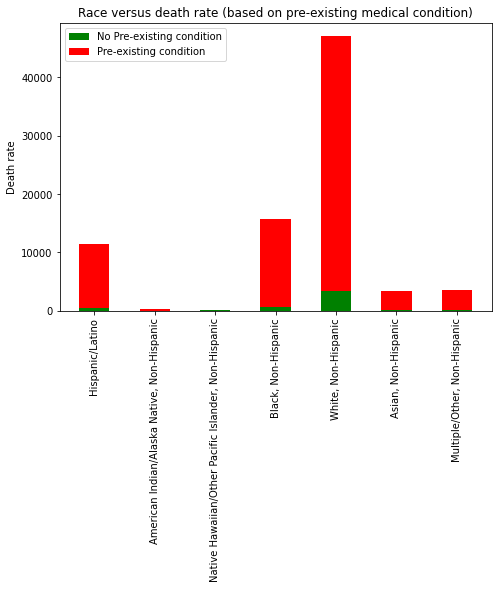

In [17]:
import numpy as np

N = len(races)
pre_cond = tuple(pre_cond)
no_pre_cond = tuple(no_pre_cond)
ind = np.arange(N) # the x locations for the groups
races = list(races)

width = 0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, no_pre_cond, width, color='g')
ax.bar(ind, pre_cond, width,bottom = no_pre_cond, color='r')
ax.set_title('Race versus death rate (based on pre-existing medical condition)')
ax.set_ylabel('Death rate')
ax.set_xticks(np.arange(len(races)))
ax.set_xticklabels(races,rotation=90)
ax.legend(labels=['No Pre-existing condition','Pre-existing condition'])

plt.show()

## Onset to disease maturity rate

In [2]:
print (len(data))
data = data.dropna()
onset_date = data['onset_dt'].tolist()

20565345


In [3]:
print (len(data))

2624165


In [4]:
import calendar
diesease_onsets = []
for i in onset_date:
    date_str = str(i).split('/')
    month_name = calendar.month_name[int(date_str[1])]
    diesease_onsets.append(month_name+ ' ' + date_str[0])

In [5]:
labels = []
for i in range(1,13):
    month_name = calendar.month_name[int(i)]
    labels.append( month_name + " " + "2020")

In [6]:
value_count = pd.Series(diesease_onsets).value_counts()
dict_cases = dict(value_count)

In [7]:
labels = labels + ['January 2021','February 2021']

In [8]:
values = []
for i in labels:
    values.append(dict_cases[i])

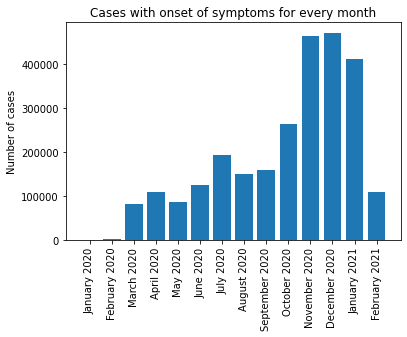

In [9]:
plt.bar(labels,values) 
plt.ylabel('Number of cases') 
plt.title('Cases with onset of symptoms for every month') 
plt.xticks(labels,rotation=90)
plt.show() 